## Clasificación morfológica de galaxias a partir de la selección de features

In [21]:
import numpy as np
%matplotlib inline


# Llamado a la libreria pandas


Función para partir los datos en training y testing:

In [2]:
def splitdata_train_test(data, fraction_training):
  # complete this function
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index], data[split_index:]

data = np.load('galaxy_catalogue.npy')

# set the fraction of data which should be in the training set
fraction_training = 0.7

# split the data using your function
training, testing = splitdata_train_test(data, fraction_training)

# print the key values
print('Number data galaxies:', len(data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234


Una mirada a los datos:

In [27]:
# Desplegar los datos (data)



Una mejor visualización con PANDAS

In [4]:
# generacion de dataframe


In [26]:
# Despliege de dataframe


Función para generar los features y targets:

In [6]:
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  targets = data['class']

  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']

  return features, targets


data = np.load('galaxy_catalogue.npy')

features, targets = generate_features_targets(data)

# Print the shape of each array to check the arrays are the correct dimensions. 
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


Primera aproximación para predecir usando árboles de decisión: 

In [7]:
# Llamado de DecisionTreeClassifier



# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  train, test = splitdata_train_test(data, 0.7)

  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)

  # instanciar el decision tree classifier
  dtc = 

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predictions = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets


data = np.load('galaxy_catalogue.npy')
    
#ejecucion de de la funcion de prediccion    
predicted_class, actual_class = 

# Print some of the initial results
print("Some initial results...\n   predicted,  actual")
for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Some initial results...
   predicted,  actual
0. merger, merger
1. elliptical, elliptical
2. spiral, spiral
3. spiral, spiral
4. spiral, spiral
5. merger, spiral
6. spiral, spiral
7. spiral, spiral
8. merger, spiral
9. merger, merger


Importación de librerías...

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import itertools
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Función de Matriz de Confusión...

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim(2.5, -0.5)     # set the xlim to left, right
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

Función para cálculo del **accuracy** ...

In [11]:
# Implement the following function
def calculate_accuracy(predicted_classes, actual_classes):
  return sum(predicted_classes == actual_classes)/len(actual_classes)

Matriz de confusión para el árbol de desición anterior: 

Our accuracy score: 0.7897435897435897
Confusion matrix, without normalization
[[233  24   3]
 [ 26 182  52]
 [  3  56 201]]


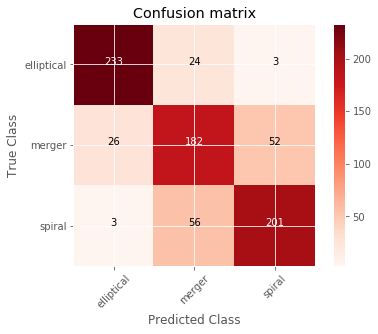

In [19]:
data = np.load('galaxy_catalogue.npy')

# split the data
features, targets = generate_features_targets(data)

# train the model to get predicted and actual classes
dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted, labels=class_labels)

# Plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()

Ahora usando Random Forrest...

In [28]:
# Llamado de RandomForestClassifier como metodo ensamble



Actualización de la función de predicción, ahora con Random Forrest:

In [23]:
# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)

  # instanciar RF con el hiperparametro n_estimators
  rfc = 
  
  # get predictions using 10-fold cross validation with cross_val_predict
  predicted = cross_val_predict(rfc, features, targets, cv=10)

  # return the predictions and their actual classes
  return predicted, targets

Accuracy score: 0.8628205128205129
Confusion matrix, without normalization
[[247  12   1]
 [ 14 209  37]
 [  3  40 217]]


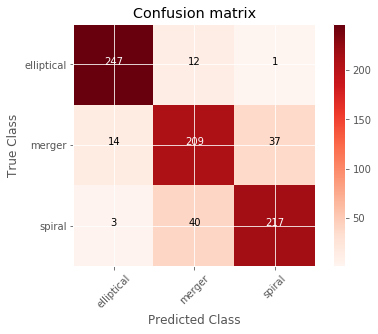

In [24]:
data = np.load('galaxy_catalogue.npy')

# get the predicted and actual classes
number_estimators = 50              # Number of trees
predicted, actual = rf_predict_actual(data, number_estimators)

# calculate the model score using your function
accuracy = calculate_accuracy(predicted, actual)
print("Accuracy score:", accuracy)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(actual))
model_cm = confusion_matrix(y_true=actual, y_pred=predicted, labels=class_labels)

# plot the confusion matrix using the provided functions.
plt.figure()
plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
plt.show()